In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite', echo = True)

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

2018-01-28 13:50:17,899 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-01-28 13:50:17,903 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:17,907 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-01-28 13:50:17,909 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:17,912 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2018-01-28 13:50:17,915 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:17,921 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("measurement")
2018-01-28 13:50:17,925 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:17,928 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'measurement' AND type = 'table'
2018-01-28 13:50:17,930 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:17,935 INFO sqlalchemy.

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

## Precipitation Analysis

In [7]:
query = "SELECT date, SUM(prcp) AS prcp_total FROM measurement WHERE date < '2015-05-01' AND date > '2014-04-30' GROUP BY date "
#result = engine.execute(query)
precip_df = pd.read_sql(query, engine)
precip_df = precip_df.set_index('date')

2018-01-28 13:50:22,007 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("SELECT date, SUM(prcp) AS prcp_total FROM measurement WHERE date < '2015-05-01' AND date > '2014-04-30' GROUP BY date ")
2018-01-28 13:50:22,010 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:22,012 INFO sqlalchemy.engine.base.Engine SELECT date, SUM(prcp) AS prcp_total FROM measurement WHERE date < '2015-05-01' AND date > '2014-04-30' GROUP BY date 
2018-01-28 13:50:22,014 INFO sqlalchemy.engine.base.Engine ()


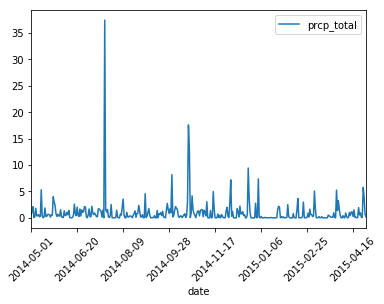

In [8]:
precip_df.plot()
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show()

In [9]:
precip_df.describe()

,prcp_total
count,365.000000
mean,0.991863
std,2.536611
min,0.000000
25%,0.030000
50%,0.340000
75%,1.180000
max,37.410000


## Station Analysis

In [10]:
conn = engine.connect()
session = Session(bind=conn)

In [11]:
station_count = session.query(Station).count()

2018-01-28 13:50:29,236 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2018-01-28 13:50:29,241 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station) AS anon_1
2018-01-28 13:50:29,243 INFO sqlalchemy.engine.base.Engine ()


In [12]:
result = engine.execute(" SELECT station, COUNT(station) AS c FROM measurement GROUP BY station ORDER BY c DESC ")
for r in result:
    print(r.station, r.c)
#USC00519281 has the most observations with 2772 observations

2018-01-28 13:50:30,765 INFO sqlalchemy.engine.base.Engine  SELECT station, COUNT(station) AS c FROM measurement GROUP BY station ORDER BY c DESC 
2018-01-28 13:50:30,768 INFO sqlalchemy.engine.base.Engine ()
USC00519281 2772
USC00513117 2696
USC00519397 2685
USC00519523 2572
USC00516128 2484
USC00514830 1937
USC00511918 1932
USC00517948 683
USC00518838 342


In [13]:
result = engine.execute(" SELECT tobs FROM measurement WHERE station = 'USC00519281'  ")
tobs_list = []
for r in result:
    tobs_list.append(r.tobs)

2018-01-28 13:50:32,888 INFO sqlalchemy.engine.base.Engine  SELECT tobs FROM measurement WHERE station = 'USC00519281'  
2018-01-28 13:50:32,890 INFO sqlalchemy.engine.base.Engine ()


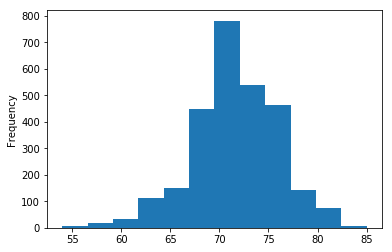

In [14]:
pd.Series(tobs_list).plot.hist(bins=12)
plt.show()

## Temperature Analysis

In [15]:
def calc_temps(start_date, end_date):
    max_query = "SELECT MAX(tobs) AS max_tobs FROM measurement WHERE date > '%s' AND date < '%s' GROUP BY date "%(start_date, end_date)
    max_eng = engine.execute(max_query)
    #max_temp feels defined in an awkward way
    max_temp = [t.max_tobs for t in max_eng][0]
    
    min_query = "SELECT MIN(tobs) AS min_tobs FROM measurement WHERE date > '%s' AND date < '%s' GROUP BY date "%(start_date, end_date)
    min_eng = engine.execute(min_query)
    min_temp = [t.min_tobs for t in min_eng][0]
    
    avg_query = "SELECT AVG(tobs) AS avg_tobs FROM measurement WHERE date > '%s' AND date < '%s' GROUP BY date "%(start_date, end_date)
    avg_eng = engine.execute(avg_query)
    avg_temp = [t.avg_tobs for t in avg_eng][0]
    
    print( "The maximum temperature was %d, the minimum temperature was %d, and the average temperature was %d."%(max_temp, min_temp, avg_temp))
    return( avg_temp, max_temp, min_temp )

In [16]:
avg_temp, max_temp, min_temp = calc_temps( '2016-05-01', '2017-05-01'  )

2018-01-28 13:50:41,255 INFO sqlalchemy.engine.base.Engine SELECT MAX(tobs) AS max_tobs FROM measurement WHERE date > '2016-05-01' AND date < '2017-05-01' GROUP BY date 
2018-01-28 13:50:41,257 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:41,266 INFO sqlalchemy.engine.base.Engine SELECT MIN(tobs) AS min_tobs FROM measurement WHERE date > '2016-05-01' AND date < '2017-05-01' GROUP BY date 
2018-01-28 13:50:41,268 INFO sqlalchemy.engine.base.Engine ()
2018-01-28 13:50:41,277 INFO sqlalchemy.engine.base.Engine SELECT AVG(tobs) AS avg_tobs FROM measurement WHERE date > '2016-05-01' AND date < '2017-05-01' GROUP BY date 
2018-01-28 13:50:41,279 INFO sqlalchemy.engine.base.Engine ()
The maximum temperature was 77, the minimum temperature was 72, and the average temperature was 74.


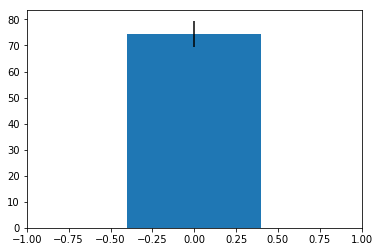

In [17]:
plt.bar([0],avg_temp, yerr = max_temp - min_temp)
plt.xlim(-1,1)

plt.show()